In [2]:
# * Librerías
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
# Define la ruta del archivo Excel
ruta_archivo = 'datos_limpios.xlsx'

# Carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta_archivo)
df.head()

,TIME_OF_DAY,AIRCRAFT,AC_MASS,PHASE_OF_FLIGHT,SPECIES,STATE,NUM_STRUCK,INCIDENT_YEAR,HEIGHT,SPEED,DISTANCE,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ
0,Day,B-727-100,4.0,Take-off Run,Unknown bird - medium,TX,1,1991,0,100,0.0,NaN,NaN
1,Day,DC-9,4.0,Landing Roll,Unknown bird - small,GA,2-10,1990,0,100,0.0,NaN,NaN
2,Day,MD-11,4.0,Landing Roll,Unknown bird - small,TX,1,1993,0,120,0.0,NaN,NaN
3,Day,MD-80,4.0,Landing Roll,American kestrel,CA,1,1990,0,125,0.0,NaN,NaN
4,NaN,B-757-200,4.0,Take-off Run,Unknown bird - medium,CA,11-100,1995,0,140,0.0,NaN,NaN


In [4]:
CATEGORICAL_COLUMNS = ['TIME_OF_DAY', 'AIRCRAFT', 'AC_MASS', 'PHASE_OF_FLIGHT', 'SPECIES', 'NUM_STRUCK']
NUMERICAL_COLUMNS = ['INCIDENT_YEAR', 'HEIGHT', 'SPEED', 'DISTANCE', 'COST_INFL_ADJ']
# Convert 'COST_REPAIRS_INFL_ADJ' and 'COST_OTHER_INFL_ADJ' from string to numeric, removing commas
df['COST_REPAIRS_INFL_ADJ'] = pd.to_numeric(df['COST_REPAIRS_INFL_ADJ'].str.replace(',', ''), errors='coerce')
df['COST_OTHER_INFL_ADJ'] = pd.to_numeric(df['COST_OTHER_INFL_ADJ'].str.replace(',', ''), errors='coerce')

# Now, you can safely add these columns
df['COST_INFL_ADJ'] = df['COST_REPAIRS_INFL_ADJ'] + df['COST_OTHER_INFL_ADJ']
# Check the result
print(df['COST_INFL_ADJ'].value_counts())

14014.0     3
2510.0      3
8155.0      2
191100.0    2
105000.0    2
           ..
143115.0    1
170375.0    1
57246.0     1
13678.0     1
367.0       1
Name: COST_INFL_ADJ, Length: 657, dtype: int64


In [5]:
df = df.drop(columns=['COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ'])
df.head()

,TIME_OF_DAY,AIRCRAFT,AC_MASS,PHASE_OF_FLIGHT,SPECIES,STATE,NUM_STRUCK,INCIDENT_YEAR,HEIGHT,SPEED,DISTANCE,COST_INFL_ADJ
0,Day,B-727-100,4.0,Take-off Run,Unknown bird - medium,TX,1,1991,0,100,0.0,NaN
1,Day,DC-9,4.0,Landing Roll,Unknown bird - small,GA,2-10,1990,0,100,0.0,NaN
2,Day,MD-11,4.0,Landing Roll,Unknown bird - small,TX,1,1993,0,120,0.0,NaN
3,Day,MD-80,4.0,Landing Roll,American kestrel,CA,1,1990,0,125,0.0,NaN
4,NaN,B-757-200,4.0,Take-off Run,Unknown bird - medium,CA,11-100,1995,0,140,0.0,NaN


In [6]:
# Encontrar las 14 categorías más comunes
top_14_species = df['SPECIES'].value_counts().head(14).index

# Reemplazar todas las otras categorías por 'Other species'
df['SPECIES'] = df['SPECIES'].apply(lambda x: x if x in top_14_species else 'Other species')

# Verificar el resultado
print('DataFrame con categorías agrupadas:')
print(df['SPECIES'].value_counts())

DataFrame con categorías agrupadas:
Unknown bird - small     18384
Other species            14117
Unknown bird - medium     6704
Unknown bird              2647
Gulls                     2428
Mourning dove             1708
Barn swallow              1409
Sparrows                  1316
European starling         1187
Unknown bird - large      1103
American kestrel           867
Killdeer                   858
Rock pigeon                856
Red-tailed hawk            750
Canada goose               662
Name: SPECIES, dtype: int64


In [7]:
# Encontrar las 19 categorías más comunes
top_19_aircraft = df['AIRCRAFT'].value_counts().head(19).index

# Reemplazar todas las otras categorías por 'Other species'
df['AIRCRAFT'] = df['AIRCRAFT'].apply(lambda x: x if x in top_19_aircraft else 'Other aircrafts')

# Verificar el resultado
print('DataFrame con categorías agrupadas:')
print(df['AIRCRAFT'].value_counts())

DataFrame con categorías agrupadas:
Other aircrafts    21213
B-737-700           5586
B-737-800           3331
B-737-300           2816
A-320               2438
B-757-200           2209
CRJ100/200          2046
A-319               1755
B-767-300           1700
A-300               1682
EMB-145             1562
EMB-170             1277
MD-82               1118
A-321               1116
C-172               1014
B-717-200            945
B-737-200            859
MD-11                855
DHC8 DASH 8          756
B-727-200            718
Name: AIRCRAFT, dtype: int64


In [8]:
df['COST_INFL_ADJ'] = df['COST_INFL_ADJ'].fillna(0)

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Suponiendo que 'df' es tu DataFrame

# Codificación one-hot para variables categóricas
encoder = OneHotEncoder()  # No especificamos 'sparse' aquí
encoded_categorical_columns = encoder.fit_transform(df[CATEGORICAL_COLUMNS]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_columns, columns=encoder.get_feature_names_out(CATEGORICAL_COLUMNS))

# Normalización de variables numéricas
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(df[NUMERICAL_COLUMNS])
scaled_numerical_df = pd.DataFrame(scaled_numerical_columns, columns=NUMERICAL_COLUMNS)

# Combinando los datos codificados y escalados de nuevo en un solo DataFrame
prepared_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)


In [10]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54996 entries, 0 to 54995
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TIME_OF_DAY_Dawn               54996 non-null  float64
 1   TIME_OF_DAY_Day                54996 non-null  float64
 2   TIME_OF_DAY_Dusk               54996 non-null  float64
 3   TIME_OF_DAY_Night              54996 non-null  float64
 4   TIME_OF_DAY_nan                54996 non-null  float64
 5   AIRCRAFT_A-300                 54996 non-null  float64
 6   AIRCRAFT_A-319                 54996 non-null  float64
 7   AIRCRAFT_A-320                 54996 non-null  float64
 8   AIRCRAFT_A-321                 54996 non-null  float64
 9   AIRCRAFT_B-717-200             54996 non-null  float64
 10  AIRCRAFT_B-727-200             54996 non-null  float64
 11  AIRCRAFT_B-737-200             54996 non-null  float64
 12  AIRCRAFT_B-737-300             54996 non-null 

## Codo

c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

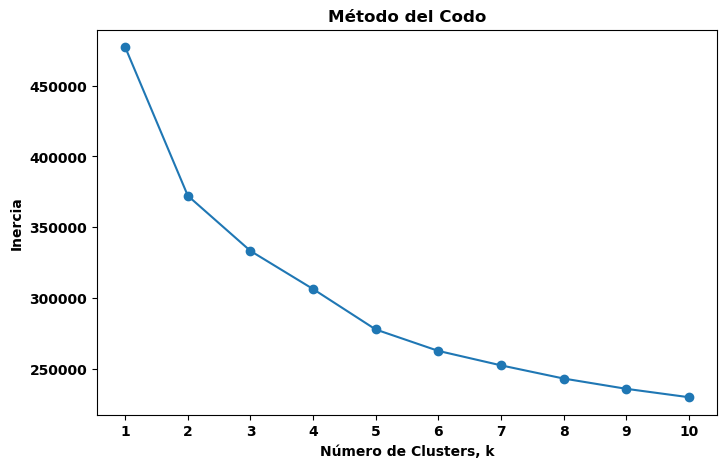

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

# Rango de valores de k para probar
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(prepared_df)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, '-o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters, k')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.show()


Parece que hay un cambio de tendencia en k = 2 y en k = 5. Lo tendremos en cuenta para elegir el número de clusters.

## Silhouette

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Ks = range(2, 12)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(prepared_df) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(prepared_df, model.labels_) for model in kmeans_per_k]

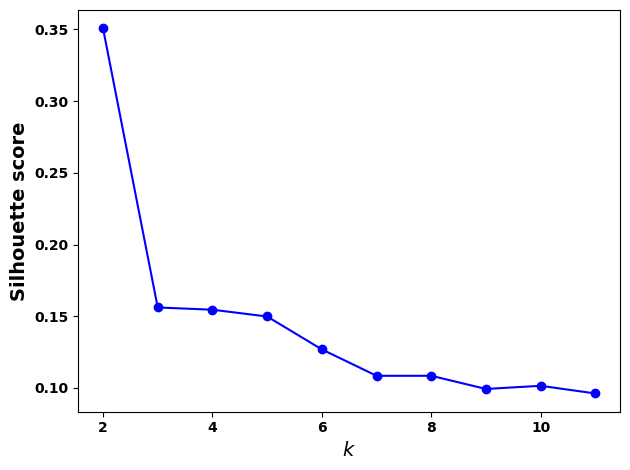

In [14]:
plt.figure()
plt.plot(Ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.tight_layout()
plt.show()

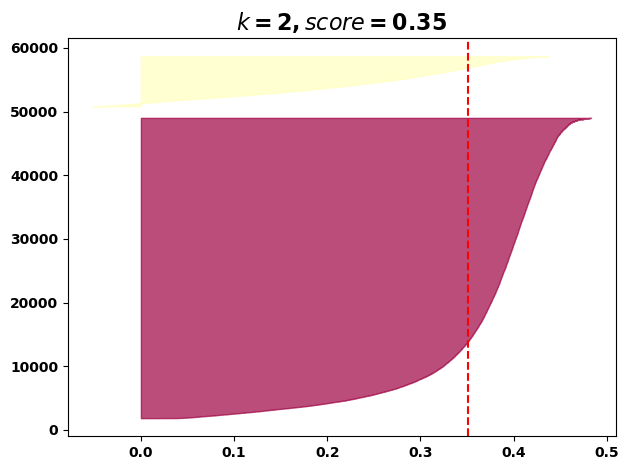

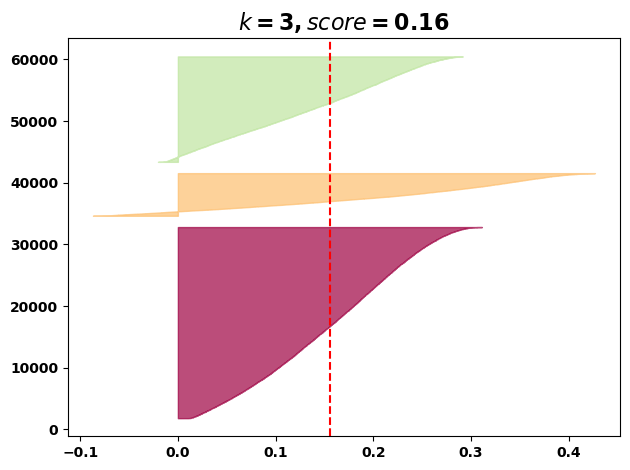

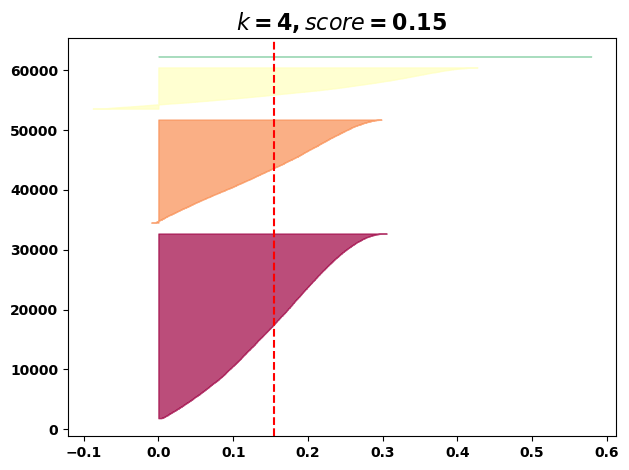

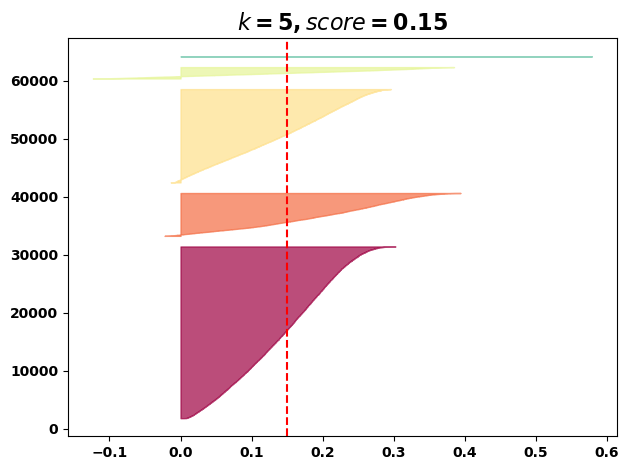

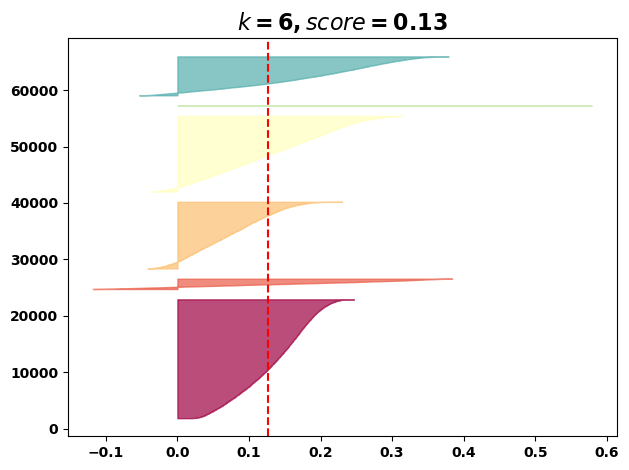

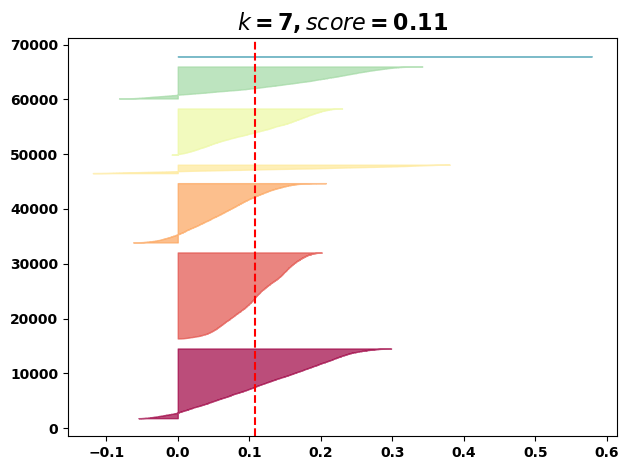

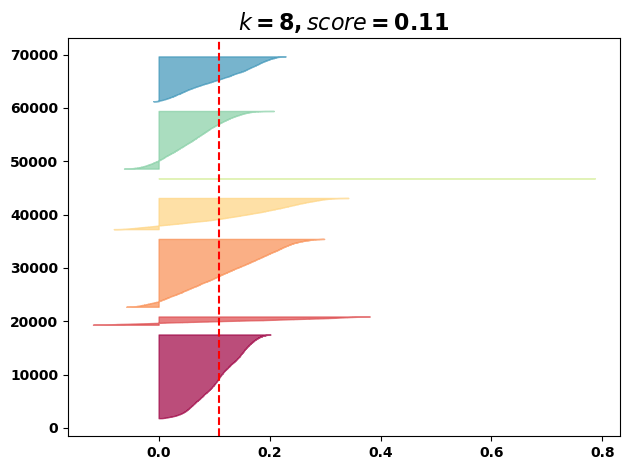

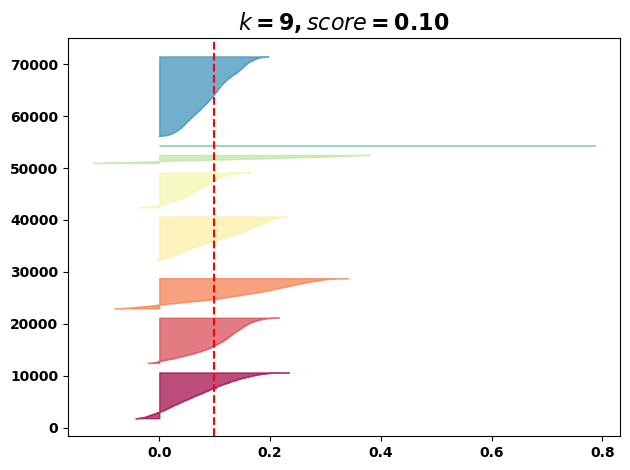

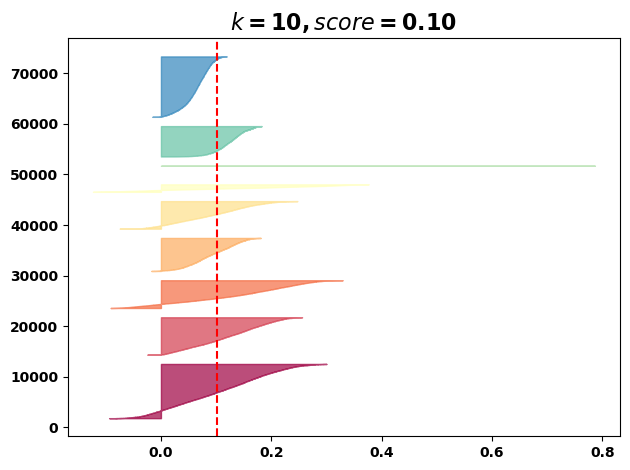

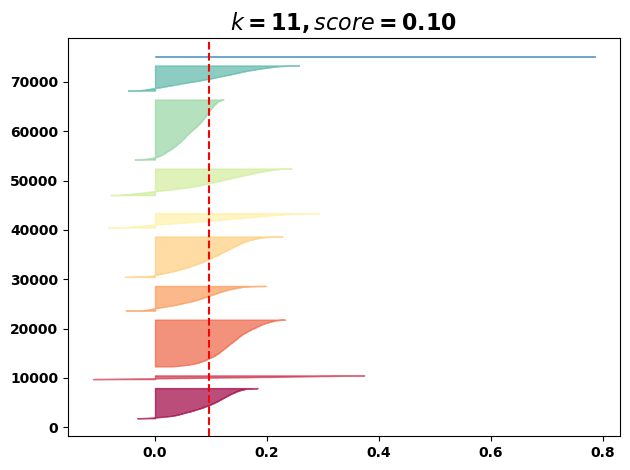

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import warnings
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def plot_silhouette(model, X):
    mu = model.cluster_centers_
    K, D = mu.shape
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    silhouette_scores = silhouette_score(X, model.labels_)
    cmap = cm.get_cmap("Pastel2")
    colors = [cmap(i) for i in range(K)]
    padding = len(X) // 30
    pos = padding
    for i in range(K):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / K)
        # color = colors[i]
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding
    score = silhouette_scores
    plt.axvline(x=score, color="red", linestyle="--")
    plt.title("$k={}, score={:0.2f}$".format(K, score), fontsize=16)


for model in kmeans_per_k:
    K, D = model.cluster_centers_.shape
    plt.figure()
    plot_silhouette(model, prepared_df)
    fname = f"kmeans_silhouette_diagram{K}.pdf"
    plt.tight_layout()


Parece que siguiendo el codo k=2 y k=5 son adecuados pero en silhouette k=2 parece mejor.

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ajuste del modelo K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(prepared_df)

# Etiquetas de cluster para cada punto
labels = kmeans.labels_

c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


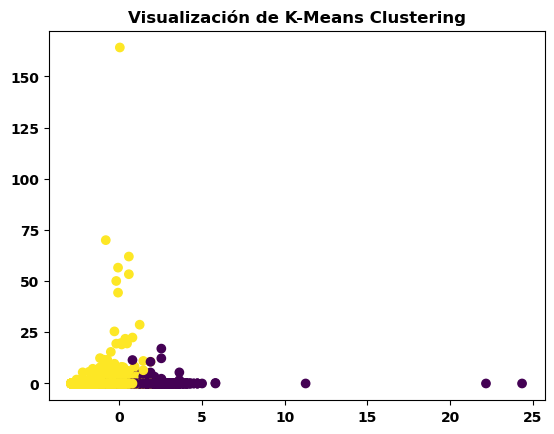

In [29]:
# Visualización (asumiendo 2D, ajusta según tus necesidades)
plt.scatter(prepared_df.iloc[:, 62], prepared_df.iloc[:,64], c=labels)
plt.title("Visualización de K-Means Clustering")
plt.show()

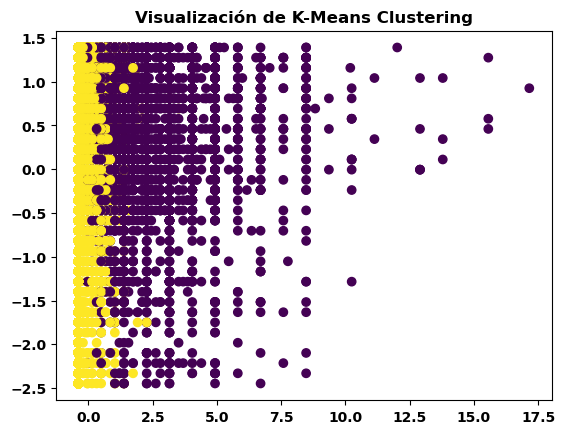

In [30]:
# Visualización (asumiendo 2D, ajusta según tus necesidades)
plt.scatter(prepared_df.iloc[:, 63], prepared_df.iloc[:,60], c=labels)
plt.title("Visualización de K-Means Clustering")
plt.show()

c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super().

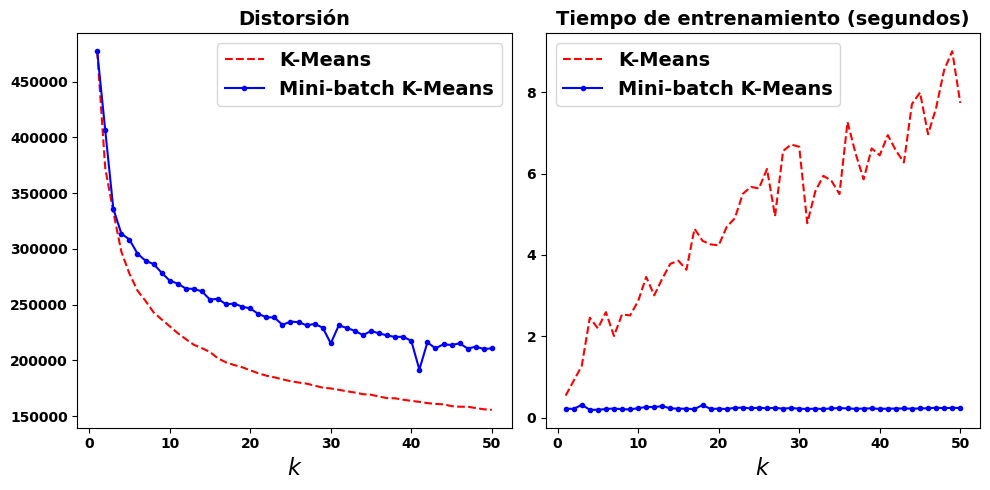

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from time import time

K = 50
times = np.empty((K, 2))
inertias = np.empty((K, 2))

for k in range(1, K + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    
    start = time()
    kmeans.fit(prepared_df)
    times[k - 1, 0] = time() - start
    inertias[k - 1, 0] = kmeans.inertia_
    
    start = time()
    minibatch_kmeans.fit(prepared_df)
    times[k - 1, 1] = time() - start
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

# Graficar la inercia y los tiempos de entrenamiento
plt.figure(figsize=(10, 5))

# Subplot para la inercia/distorsión
plt.subplot(121)
plt.plot(range(1, K + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, K + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Distorsión", fontsize=14)
plt.legend(fontsize=14)

# Subplot para el tiempo de entrenamiento
plt.subplot(122)
plt.plot(range(1, K + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, K + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Tiempo de entrenamiento (segundos)", fontsize=14)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


## Hierarchical Aglomerative Clustering HAC

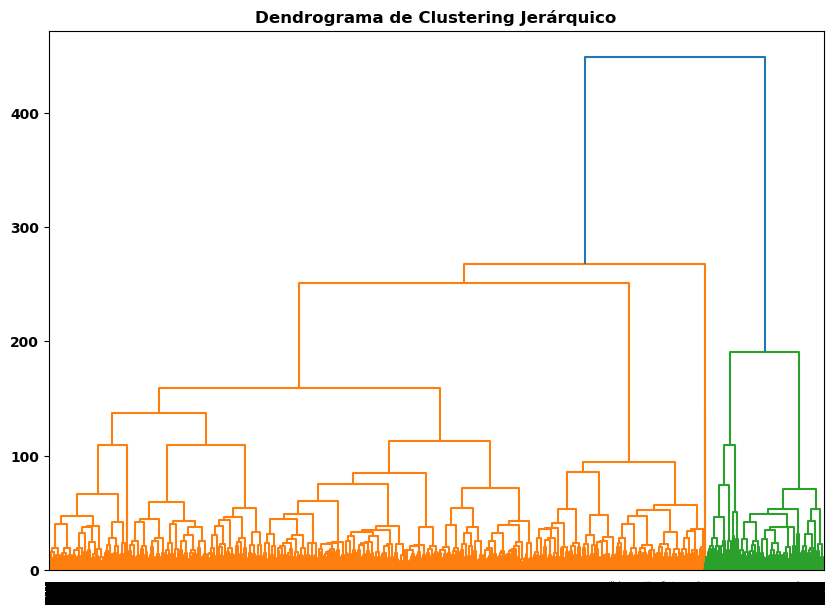

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generación del linkage
linked = linkage(prepared_df, method='ward')

# Visualización del dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma de Clustering Jerárquico")
plt.show()


Como no se diferencia muy bien, vamos a poner una linea en el mayor incremento en distancia de la clasificación para ver el corte donde se obtendrían dos clusters.

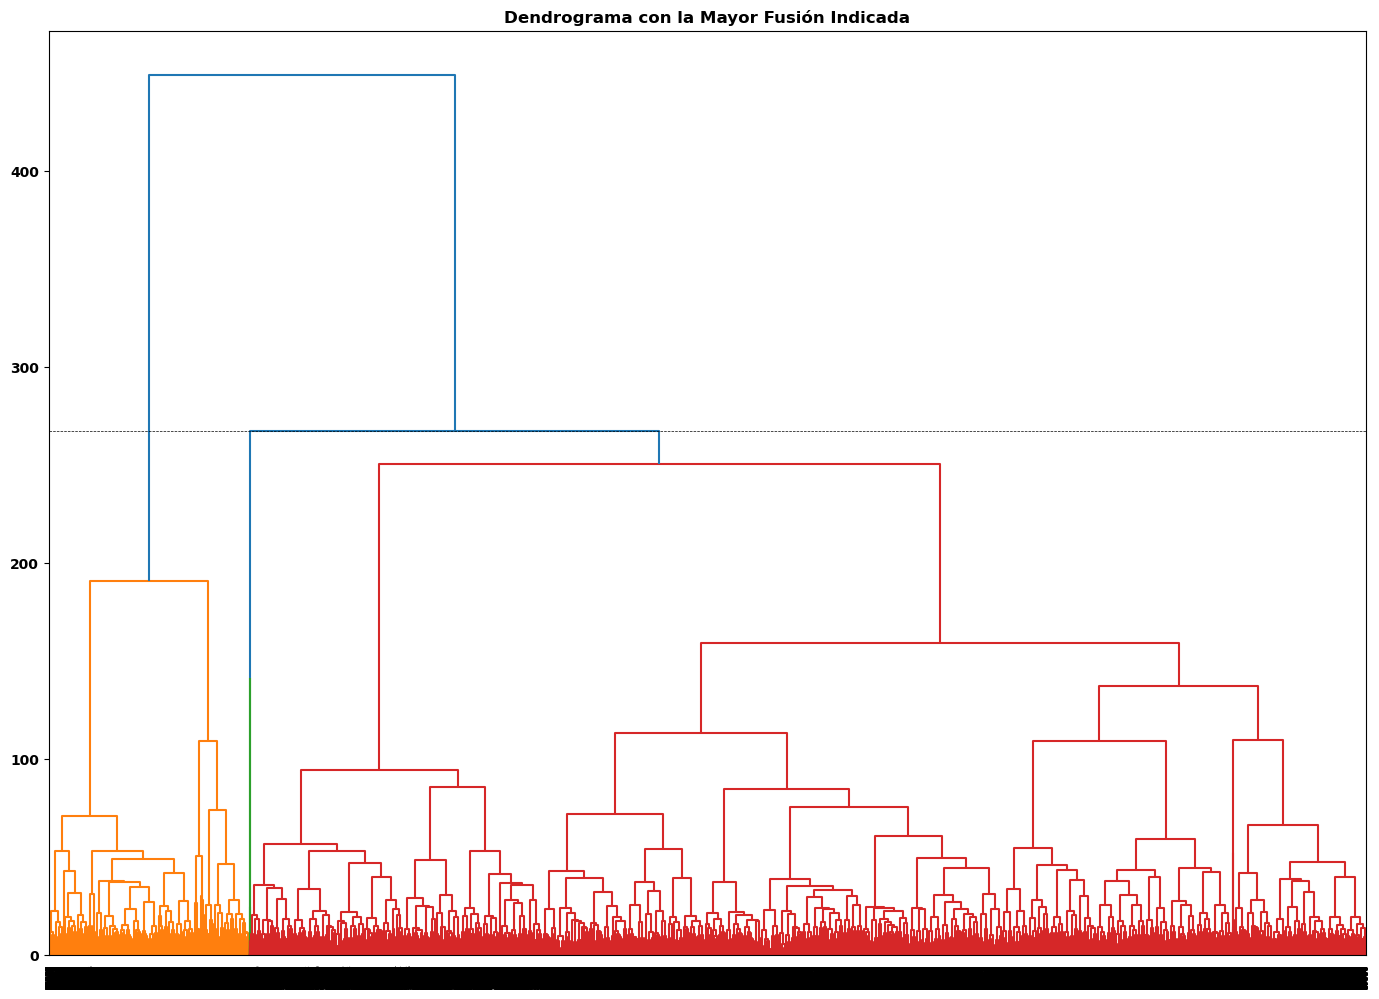

In [ ]:
import numpy as np

distances = linked[:, 2]
# Calcular los incrementos de distancia entre fusiones sucesivas
increments = np.diff(distances)

# Identificar la fusión con el mayor incremento en distancia
largest_increment_index = np.argmax(increments)
# La distancia en la que ocurre esta fusión
largest_increment_distance = distances[largest_increment_index]

# Visualización del dendrograma con una línea que indica la fusión más grande
plt.figure(figsize=(17, 12))
dendrogram(linked, orientation='top', color_threshold=largest_increment_distance)
plt.axhline(y=largest_increment_distance, c='k', ls='--', lw=0.5)
plt.title("Dendrograma con la Mayor Fusión Indicada")
plt.show()

# Esta distancia sugiere un buen punto de corte para obtener dos clusters

## DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

# Ajuste del modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan.fit(prepared_df)

# Etiquetas de cluster
labels = dbscan.labels_


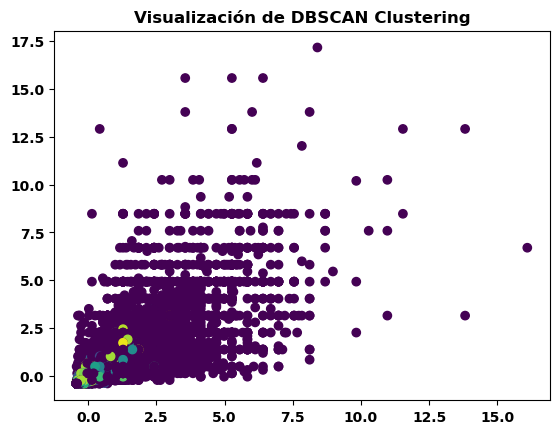

In [12]:
# Visualización (asumiendo 2D, ajusta según tus necesidades)
plt.scatter(prepared_df.iloc[:, 61], prepared_df.iloc[:, 63], c=labels)
plt.title("Visualización de DBSCAN Clustering")
plt.show()

Una esfera no tiene porque ser la mejor forma de agrupar los datos, por eso probamos también:

## Gaussian Mixture Model GMM

Miramos el BIC y AIC para saber el número de componentes. Esto mide la calidad del modelo teniendo en cuenta la penalización por la cantidad de parámetros

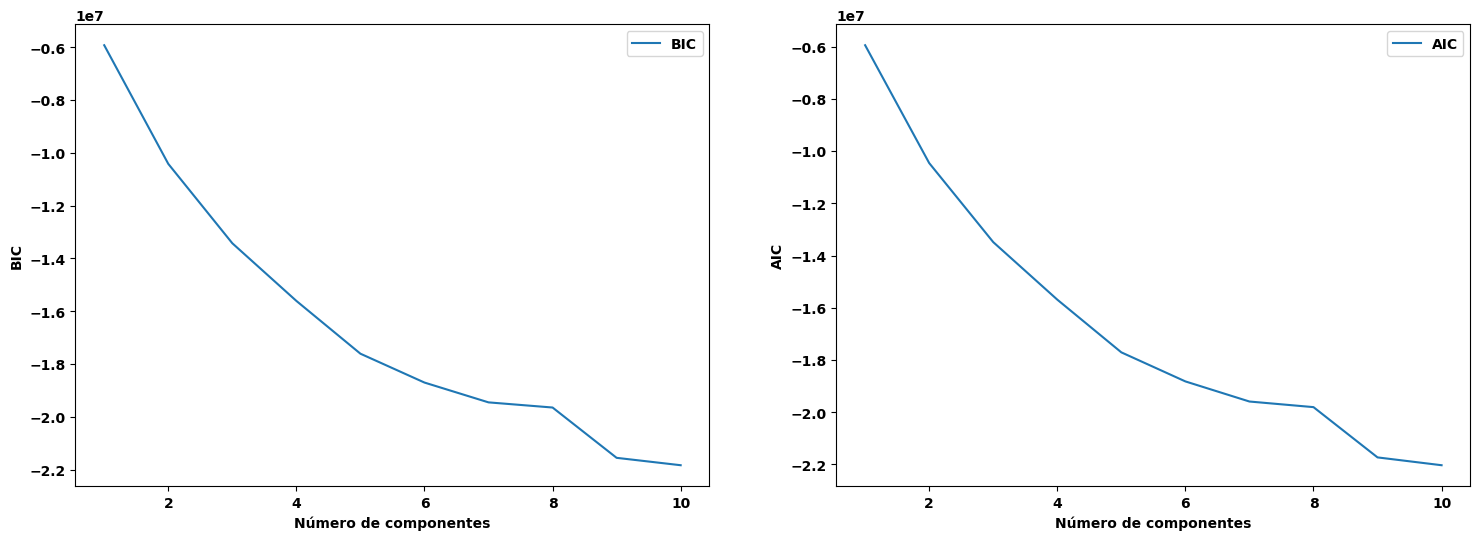

In [15]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(1, 11)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(prepared_df)
    bics.append(gmm.bic(prepared_df))
    aics.append(gmm.aic(prepared_df))

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(n_components_range, bics, label='BIC')
plt.xlabel('Número de componentes')
plt.ylabel('BIC')
plt.legend()

plt.subplot(122)
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Número de componentes')
plt.ylabel('AIC')
plt.legend()

plt.show()


Parece ser 5 el número de componentes donde se suaviza más la curva

BIC: -17610759.75076881
AIC: -17709306.33469573


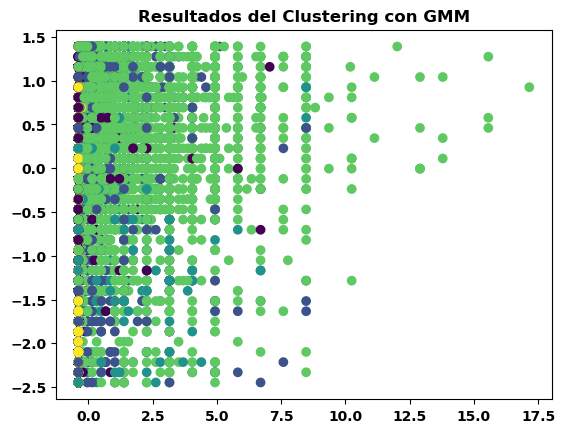

In [17]:
from sklearn.mixture import GaussianMixture

# Ajustar el modelo de mezclas gaussianas
n_components = 5 
gmm = GaussianMixture(n_components=n_components, covariance_type='full', n_init=10, random_state=42)
gmm.fit(prepared_df)

# Predecir los clusters (asignaciones de componente gaussiano para cada muestra)
clusters = gmm.predict(prepared_df)

# Calcular BIC y AIC para evaluar el número de componentes
bic = gmm.bic(prepared_df)
aic = gmm.aic(prepared_df)

print('BIC:', bic)
print('AIC:', aic)


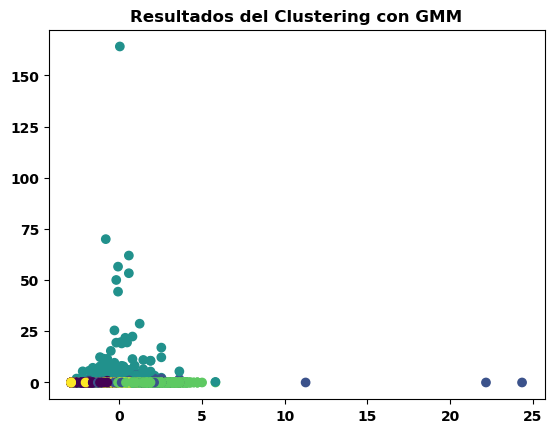

In [26]:
plt.scatter(prepared_df.iloc[:, 62], prepared_df.iloc[:, 64], c=clusters, cmap='viridis')
plt.title('Resultados del Clustering con GMM')
plt.show()